# Creating datasets

From chapter 4 of [Practical Deep Learning](https://nostarch.com/practical-deep-learning-python-2E)

In [1]:
import numpy as np

## Some basics

`np.zeros` to create an array filled with 0s
`np.ones` to create an array filled with 1s
`np.full` to create an array with a specified value
`np.arange` to create an array counting from 0

`np.random`
`np.argsort` to return the indices that would sort an array


`np.copy` to copy an array
`np.reshape` to change the shape of an array

`np.loadtxt` to load from a txt or csv file
`np.savetxt`


### With images

`np.array` can take a PIL(low) image as argument

In [2]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

`make_classification` creates a classification problem

In [3]:

from sklearn.datasets import make_classification

x,y = make_classification(n_samples=10000, weights=[0.9, 0.1])
print(np.shape(x))
print(np.shape(y))

(10000, 20)
(10000,)


In [4]:
x[:2]

array([[ 4.15275881,  0.67449261,  2.54006193, -1.22384115, -0.68381925,
         2.29292281, -0.70236052, -0.81937816,  1.69293093,  1.6039852 ,
         0.76693929, -1.06816632,  0.29924227,  1.11615328,  0.0270897 ,
        -0.50500138, -2.31791612,  0.24699267, -2.0755473 , -2.79744223],
       [ 0.57562976, -1.39615536,  0.74972053, -1.97427469, -0.19725601,
        -1.25256698,  1.39669798, -0.9844224 ,  0.95898122, -0.25955279,
        -0.34463896, -1.71784408,  0.6220321 ,  0.6045279 , -0.9175114 ,
        -1.1467209 , -0.26071563,  0.37500637, -1.68080475, -0.44126925]])

In [5]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [6]:
len(np.where(y == 0)[0])

8963

In [7]:
x,y = make_classification(n_samples=10000, n_informative=7, n_features=10, n_classes=3, weights=[0.5, 0.3, 0.2])
print(np.shape(x))
print(np.shape(y))

(10000, 10)
(10000,)


In [8]:
y[:10]

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0])

> **Note**
> When adding more classes, `n_informative` needs to be larger too.. Or `n_clusters_per_class` needs to be changed.

# Shuffling the samples

In [9]:
idx = np.argsort(np.random.random(y.shape[0]))
print(np.shape(idx))
x = x[idx]
y = y[idx]
print(np.shape(x))
print(np.shape(y))

(10000,)
(10000, 10)
(10000,)


# Extracting one column (feature)

In [10]:
second_feature = x[:, 2]
print(np.shape(second_feature))

(10000,)


In [11]:
print("mean     = %0.4f" % second_feature.mean())
print("std      = %0.4f" % second_feature.std())
print("SE       = %0.4f" % (second_feature.std() / np.sqrt(second_feature.shape[0])))
print("median   = %0.4f" % np.median(second_feature))
print("min      = %0.4f" % second_feature.min())
print("max      = %0.4f" % second_feature.max())

mean     = 0.4310
std      = 2.3231
SE       = 0.0232
median   = 0.4115
min      = -9.3235
max      = 8.2509


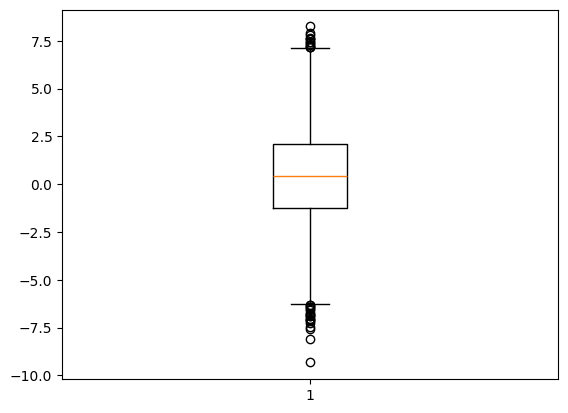

In [12]:
import matplotlib.pyplot as plt

plt.boxplot(second_feature)
plt.show()



# To normalize data

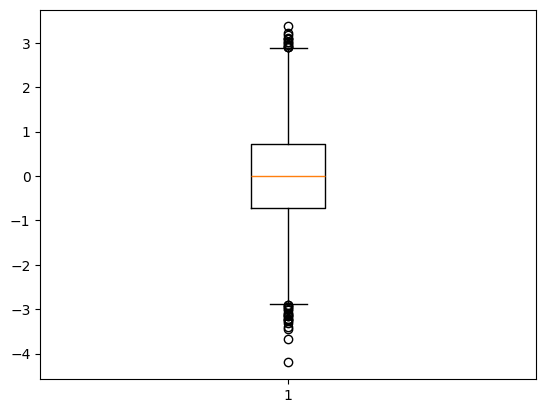

In [13]:
normalized_x = (x - x.mean(axis=0)) / x.std(axis=0)
plt.boxplot(normalized_x[:,2])
plt.show()

# Preparing a dataset for training

In [14]:
# Creating a set and separating the samples
a,b = make_classification(n_samples=10000, weights=[0.8,0.2])
idx = np.where(b==0)[0]
x0 = a[idx,:]
y0 = b[idx]
idx = np.where(b==1)[0]
x1 = a[idx,:]
y1 = b[idx]

In [15]:
# Shuffling each of the subsets
idx = np.argsort(np.random.random(y0.shape))
y0 = y0[idx]
x0 = x0[idx]
idx = np.argsort(np.random.random(y1.shape))
y1 = y1[idx]
x1 = x1[idx]

In [16]:
ntrn0 = int(0.9 * x0.shape[0])
ntrn1 = int(0.9 * x1.shape[0])
xtrn = np.zeros((int(ntrn0+ntrn1), 20)) # 20 is the default number of features
ytrn = np.zeros(int(ntrn0+ntrn1))
xtrn[:ntrn0] = x0[:ntrn0]
xtrn[ntrn0:] = x1[:ntrn1]
ytrn[:ntrn0] = y0[:ntrn0]
ytrn[ntrn0:] = y1[:ntrn1]

# xtrn,ytrn now has training data (90% of the total size) with a proportional
# mix of data per label.
# Everything up to index ntrn0 has label 0 and after has label 1


In [17]:
# Validation and test data take half of what is left so we take half for each
n0 = int( x0. shape[ 0]-ntrn0)
n1 = int( x1. shape[ 0]-ntrn1)
xval = np.zeros(( int( n0// 2 + n1// 2), 20))
yval = np.zeros( int( n0// 2 + n1// 2))
xval[:( n0// 2)] = x0[ ntrn0:( ntrn0 + n0// 2)]
xval[( n0// 2):] = x1[ ntrn1:( ntrn1 + n1// 2)]
yval[:( n0// 2)] = y0[ ntrn0:( ntrn0 + n0// 2)]
yval[( n0// 2):] = y1[ ntrn1:( ntrn1 + n1// 2)]

xtst = np.concatenate(( x0[( ntrn0 + n0// 2):], x1[( ntrn1 + n1// 2):]))
ytst = np.concatenate(( y0[( ntrn0 + n0// 2):], y1[( ntrn1 + n1// 2):]))

When data set is too small, it's possible to use [k-fold cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#Leave-one-out_cross-validation)